See the parent `0840_Results.ipynb` notebook.

#### Notebook config

##### Loading modules

In [26]:
# %load ../../software/fullwavepy/fullwavepy/config/jupyter.py 
from fullwavepy import * # Load modules imported in fullwavepy/__init__.py
# -----------------------------------------------------------------------------
# Set aliases of frequently used jupyter magic commands
# -----------------------------------------------------------------------------
%alias_magic mi matplotlib -p inline
%alias_magic mn matplotlib -p notebook
# -----------------------------------------------------------------------------
# Set matplotlib backend
# -----------------------------------------------------------------------------
# non-interactive plots displayed in a notebook cell
%matplotlib inline
# interactive plots displayed in a notebook cell
# %matplotlib notebook (interactive version)
# -----------------------------------------------------------------------------
# Set matplotlib style
# ----------------------------------------------------------------------------
plt.style.reload_library()
# a combined style (right overwrites left wherever they overlap):
plt.style.use(['default', 'ggplot']) #, 'ggplot', 'kmc_test']) # 'dark_background'
# print(plt.style.available) 
# -----------------------------------------------------------------------------
# Configure logging
# -----------------------------------------------------------------------------
# Set up loggers, handlers and load the log_lvl function
from fullwavepy.config.logging import *
# -----------------------------------------------------------------------------
# Set level of log-messages
log_lvl(INFO) 
# Other options in order of increasing importance and 
# decreasing verbosity:
# TRACE, DEBUG, INFO, WARNING, ERROR, CRITICAL
# or using integers: 0, 10, 20, 30, 40, 50, respectively
# -----------------------------------------------------------------------------
# Autocompleting
# -----------------------------------------------------------------------------
#  Not sure if it works
%config IPCompleter.greedy=True 
# -----------------------------------------------------------------------------
# Automatically reload modules before execution
#%load_ext autoreload
#%autoreload 2

Created `%mi` as an alias for `%matplotlib inline`.
Created `%mn` as an alias for `%matplotlib notebook`.


In [27]:
from arrau import *
import pandas as pd
from fullwavepy.seismic.plots import plot_mod

##### Paths


In [3]:
path_fig = '../../figures/ch_kol/'

##### Plot config

In [28]:
plt.style.use(['default', 'seaborn-dark']) #, 'dark_background'])
import matplotlib
font = {'family' : 'sans-serif', # serif
        'weight' : 'normal', # bold
        'size'   : 12}
matplotlib.rc('font', **font)

##### Loading projects


In [29]:
# Box 
# in seconds
dt = 0.0025  
ns = 2000
# in metres
dx = 50      
x1 = +8.0e3     
x2 = +2.5e4    
y1 = -3.0e3    
y2 = +1.5e4    
z1 = 0 
z2 = +4.0e3    
box = [x1, x2, y1, y2, z1, z2]
# bigger_box = box
geom_bigger = dict(dt=dt, ns=ns, dx=dx, box=box)

In [30]:
# p14 = ProjInv('p14', path='/home/kmc3817/c_projects_phd/fwi_sant_kolumbo/', 
# box=b01.box,ns=2e3)
lll(40)
path = '/home/kmc3817/c_projects_phd/fwi_sant_kolumbo/'
p14 = ProjInv('p14', path=path, **geom_bigger) # Lasso selected.

Content of  /home/kmc3817/c_projects_phd/fwi_sant_kolumbo//p14/p14-Info.txt : 
 cat: /home/kmc3817/c_projects_phd/fwi_sant_kolumbo//p14/p14-Info.txt: No such file or directory



##### Loading PROTEUS


In [31]:
xp = PROTEUS()

# All shots

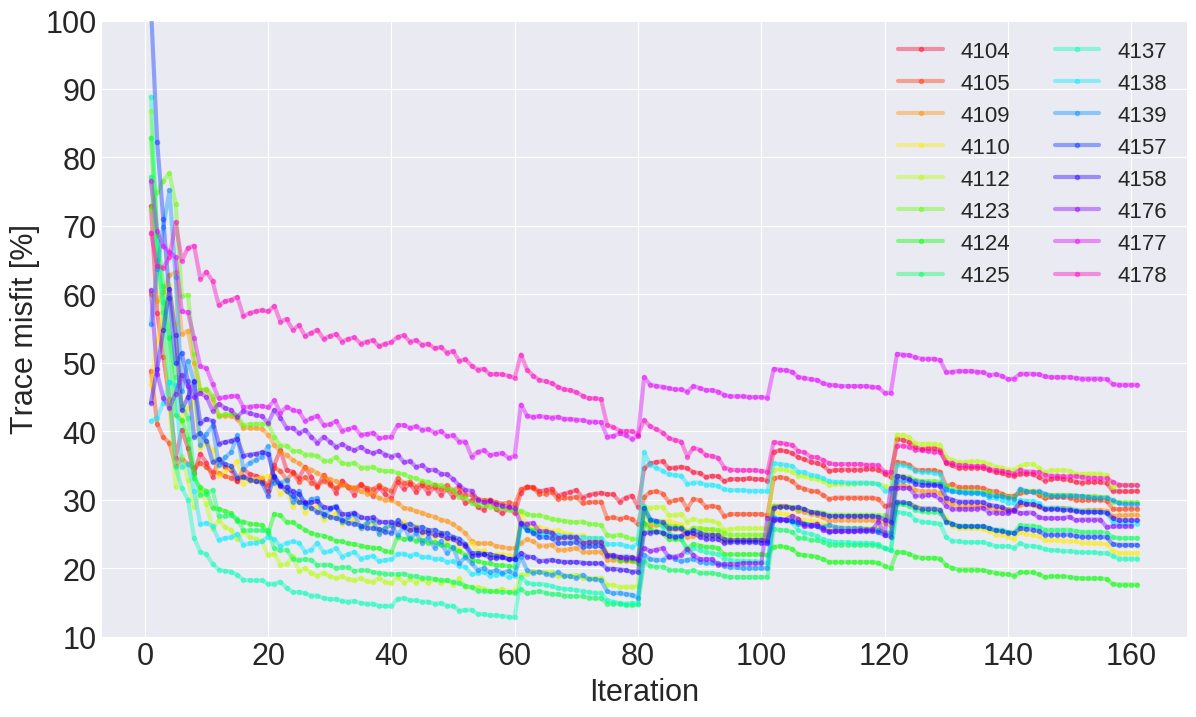

In [15]:
# plot 
figure(14,8)
p14.o.fit.plot(run_ids=[1,2], cmap='gist_rainbow')
plt.legend(prop={'size': 16}, ncol=2)
plt.grid() #color='Gray', linestyle='-', linewidth=.5)
plt.ylim(10,100)
# plt.savefig(path_fig+'kol_fit.png', bbox_inches='tight') # remove white margins
plt.show()

# Average

# Animate

In [61]:
def plot_fit(fit, it, sids):
    assert it > 0
    plt.figure()
    for sid in sids:
        y = fit[sid][:it]
        x = np.arange(1, len(y)+1)
        
        plt.plot(x, y, marker='o')
    plt.xlabel('iteration')
    plt.ylabel('total misfit (%)')
    plt.xlim(-1,161)
    plt.ylim(0,100)

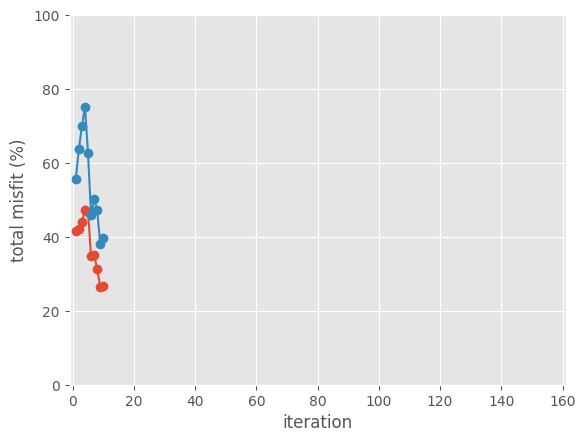

In [62]:
fit = p14.o.fit.read(run_ids=[1,2])
plot_fit(fit, 10, [4138, 4139])

In [63]:
# sid = 4139 
# for it in range(0,161,20):
#     if it == 0:
#         continue
#     y = fit[sid][:it]
#     x = np.arange(1, len(y)+1)
#     plt.figure()
#     plt.plot(x, y, marker='o')
#     plt.xlabel('iteration')
#     plt.ylabel('total misfit (%)')
#     plt.xlim(-1,161)
#     plt.ylim(0,100)
# # plt.grid(False)

# ...